In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
from numpy import mean
from numpy import std
#import the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline

In [10]:
train = pd.read_csv('train.csv').drop('datasetId',axis=1)
test = pd.read_csv('test.csv').drop('datasetId',axis=1)

swell_data = pd.concat([train,test], axis=0) 
swell_data = swell_data.reset_index(drop=True) 

In [11]:
columns = swell_data.columns
print(columns)

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'condition'],
      dtype='object')


In [5]:
#1
columns = ['MEAN_RR', 'MEDIAN_RR', 'pNN25', 'SD2', 'KURT', 'KURT_REL_RR', 'VLF', 'LF', 'LF_NU', 'HF', 'HF_NU', 'LF_HF', 'condition']

swell_data = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data[cat_col] = label_encoder.fit_transform(swell_data[cat_col])

X = swell_data.drop('condition', axis=1)
y = swell_data['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

LR: 0.614455 (0.001179)
LDA: 0.603807 (0.001394)
KNN: 0.994821 (0.000286)
CART: 0.998983 (0.000161)
NB: 0.545972 (0.001974)
RF: 1.000000 (0.000000)
ETC: 1.000000 (0.000000)
Bagg: 0.999537 (0.000046)
AdaBoost: 0.675535 (0.008016)
GradBoost: 0.869413 (0.003752)


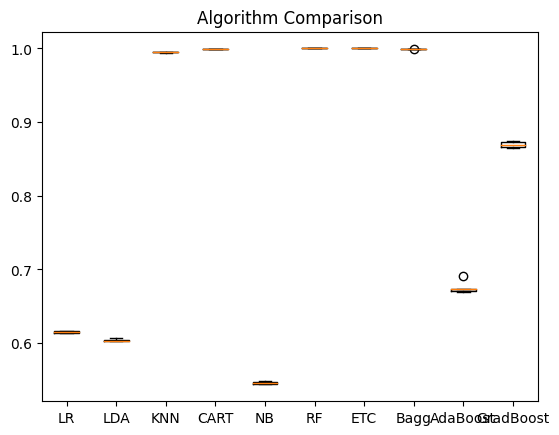

In [10]:
num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [13]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Use calibrated classification to address bias
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
calibrated_clf.fit(X_train, Y_train)

# Make predictions and evaluate performance
y_pred = calibrated_clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
confusion_mat = confusion_matrix(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:", confusion_mat)


Accuracy: 1.0
Confusion matrix: [[23387     0     0]
 [    0 44448     0]
 [    0     0 14230]]


In [15]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 300, max_depth=8, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8841284347773106
[[19170  4078   139]
 [  544 43784   120]
 [  165  4463  9602]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     23387
           1       0.84      0.99      0.90     44448
           2       0.97      0.67      0.80     14230

    accuracy                           0.88     82065
   macro avg       0.92      0.83      0.86     82065
weighted avg       0.90      0.88      0.88     82065



In [16]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 200, max_depth=6, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.7912995796015354
[[14598  8185   604]
 [  551 43484   413]
 [  800  6574  6856]]
              precision    recall  f1-score   support

           0       0.92      0.62      0.74     23387
           1       0.75      0.98      0.85     44448
           2       0.87      0.48      0.62     14230

    accuracy                           0.79     82065
   macro avg       0.84      0.69      0.74     82065
weighted avg       0.82      0.79      0.78     82065



In [17]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 300, max_depth=10, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9575092914153415
[[22340  1010    37]
 [  134 44257    57]
 [   89  2160 11981]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     23387
           1       0.93      1.00      0.96     44448
           2       0.99      0.84      0.91     14230

    accuracy                           0.96     82065
   macro avg       0.97      0.93      0.95     82065
weighted avg       0.96      0.96      0.96     82065



In [18]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 400, max_depth=12, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9903247425820996
[[23073   293    21]
 [   98 44264    86]
 [    1   295 13934]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     23387
           1       0.99      1.00      0.99     44448
           2       0.99      0.98      0.99     14230

    accuracy                           0.99     82065
   macro avg       0.99      0.99      0.99     82065
weighted avg       0.99      0.99      0.99     82065



In [19]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9991104612197648
[[23387     0     0]
 [    7 44381    60]
 [    0     6 14224]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23387
           1       1.00      1.00      1.00     44448
           2       1.00      1.00      1.00     14230

    accuracy                           1.00     82065
   macro avg       1.00      1.00      1.00     82065
weighted avg       1.00      1.00      1.00     82065



In [13]:
#2
columns = ['SDRR', 'MEDIAN_RR', 'MEAN_RR', 'RMSSD', 'SDSD', 'condition']

swell_data2 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data2[cat_col] = label_encoder.fit_transform(swell_data2[cat_col])

X = swell_data2.drop('condition', axis=1)
y = swell_data2['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

LR: 0.607335 (0.001397)
LDA: 0.604694 (0.001641)
KNN: 0.999348 (0.000086)
CART: 0.997819 (0.000232)
NB: 0.592195 (0.001407)
RF: 0.999726 (0.000082)
ETC: 0.999887 (0.000025)
Bagg: 0.998766 (0.000165)
AdaBoost: 0.628172 (0.007674)
GradBoost: 0.792800 (0.001576)


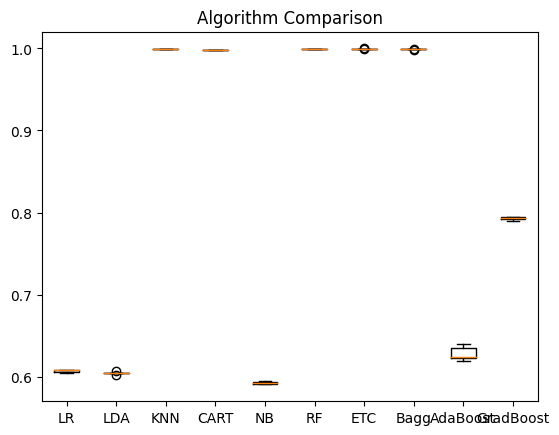

In [14]:
num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [10]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6],
    'criterion' :['gini', 'entropy']
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

CV_rfc.best_params_q

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}

In [ ]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [9]:
#3
columns = ['MEAN_RR', 'pNN25', 'pNN50', 'SD2', 'MEDIAN_REL_RR', 'RMSSD_REL_RR', 'SKEW_REL_RR', 'SDSD_REL_RR', 'VLF_PCT', 'LF_HF', 'condition']

swell_data3 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data3[cat_col] = label_encoder.fit_transform(swell_data3[cat_col])

X = swell_data3.drop('condition', axis=1)
y = swell_data3['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

LR: 0.597489 (0.004770)
LDA: 0.595156 (0.001032)
KNN: 0.998800 (0.000113)
CART: 0.999177 (0.000076)
NB: 0.593242 (0.001629)
RF: 1.000000 (0.000000)
ETC: 1.000000 (0.000000)
Bagg: 0.999628 (0.000055)
AdaBoost: 0.678874 (0.010611)
GradBoost: 0.873020 (0.002140)


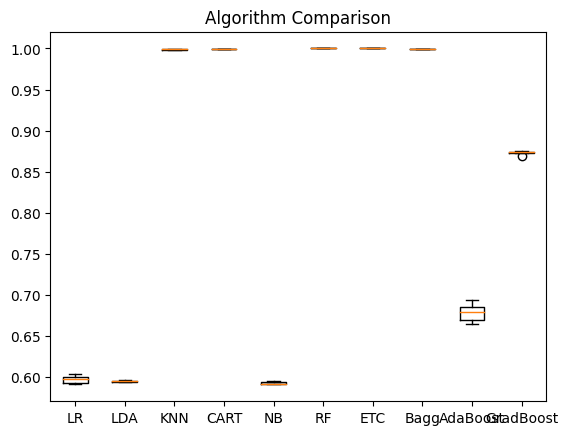

In [17]:
num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [22]:
#4
columns = ['RMSSD', 'SDRR_RMSSD', 'pNN25', 'VLF', 'LF', 'HF_PCT', 'HF_NU', 'sampen', 'condition']

swell_data4 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data4[cat_col] = label_encoder.fit_transform(swell_data4[cat_col])

X = swell_data4.drop('condition', axis=1)
y = swell_data4['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

LR: 0.603192 (0.001899)
LDA: 0.600310 (0.001552)
KNN: 0.800476 (0.000507)
CART: 0.997886 (0.000217)
NB: 0.472316 (0.001682)
RF: 1.000000 (0.000000)
ETC: 1.000000 (0.000000)
Bagg: 0.999284 (0.000125)
AdaBoost: 0.646177 (0.008876)
GradBoost: 0.820065 (0.002263)


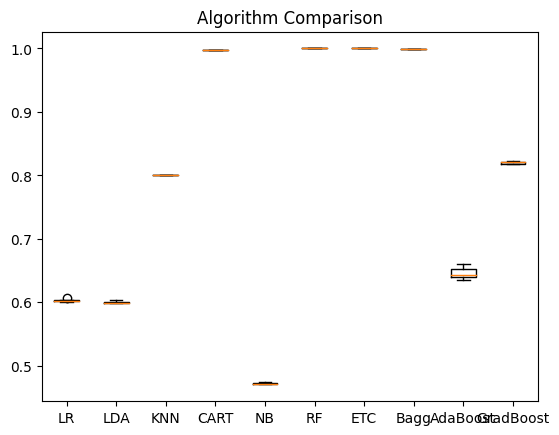

In [20]:
num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [24]:
#5
columns = ['MEDIAN_RR', 'SDRR_RMSSD', 'SD1', 'SKEW', 'VLF', 'sampen', 'condition']

swell_data5 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data5[cat_col] = label_encoder.fit_transform(swell_data5[cat_col])

X = swell_data5.drop('condition', axis=1)
y = swell_data5['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

LR: 0.617903 (0.001544)
LDA: 0.608974 (0.002219)
KNN: 0.880883 (0.000746)
CART: 0.998739 (0.000152)
NB: 0.535973 (0.002040)
RF: 1.000000 (0.000000)
ETC: 1.000000 (0.000000)
Bagg: 0.999357 (0.000094)
AdaBoost: 0.645619 (0.006297)
GradBoost: 0.828037 (0.002057)


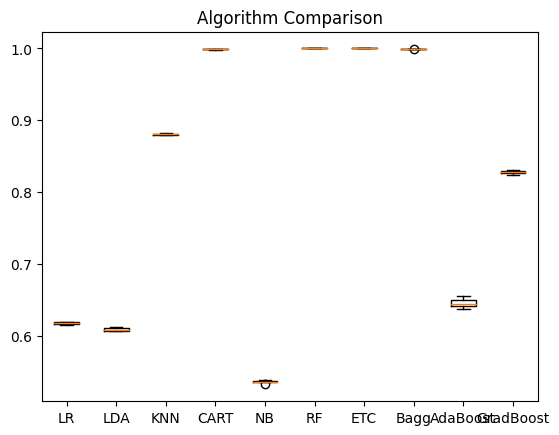

In [25]:
num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [15]:
#6
columns = ['MEDIAN_RR', 'HR', 'pNN50', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'LF_PCT', 'HF', 'higuci', 'condition']

swell_data6 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data6[cat_col] = label_encoder.fit_transform(swell_data6[cat_col])

X = swell_data6.drop('condition', axis=1)
y = swell_data6['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

In [16]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8],
    'criterion' :['gini', 'entropy']
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 300}

LR: 0.603996 (0.001261)
LDA: 0.590403 (0.001486)
KNN: 0.994154 (0.000355)
CART: 0.998766 (0.000100)
NB: 0.543099 (0.001610)
RF: 0.999997 (0.000006)
ETC: 1.000000 (0.000000)
Bagg: 0.999506 (0.000140)
AdaBoost: 0.666505 (0.006195)
GradBoost: 0.871552 (0.002086)


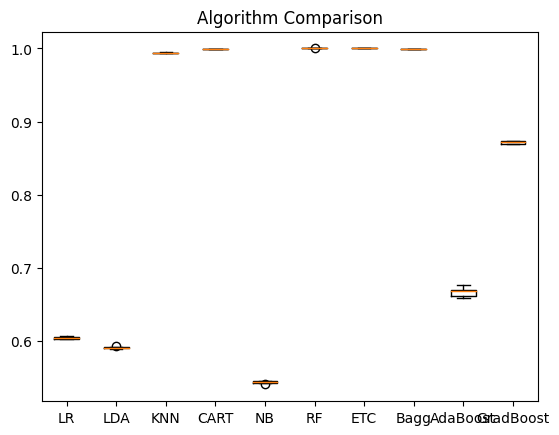

In [28]:
num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [47]:
#ADASYN (Adaptive Synthetic Sampling): Generates more synthetic samples for the minority class in regions of the feature space where the class is underrepresented.
from imblearn.over_sampling import ADASYN

# Define ADASYN strategy
adasyn = ADASYN()

#1
columns = ['MEAN_RR', 'MEDIAN_RR', 'pNN25', 'SD2', 'KURT', 'KURT_REL_RR', 'VLF', 'LF', 'LF_NU', 'HF', 'HF_NU', 'LF_HF', 'condition']

#pre-process
swell_data_1 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_1[cat_col] = label_encoder.fit_transform(swell_data_1[cat_col])

X = swell_data_1.drop('condition', axis=1)
y = swell_data_1['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = adasyn.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9981859070464768
[[44470     0     0]
 [   14 44206   228]
 [    0     0 44482]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44470
           1       1.00      0.99      1.00     44448
           2       0.99      1.00      1.00     44482

    accuracy                           1.00    133400
   macro avg       1.00      1.00      1.00    133400
weighted avg       1.00      1.00      1.00    133400



In [50]:
#ADASYN (Adaptive Synthetic Sampling): Generates more synthetic samples for the minority class in regions of the feature space where the class is underrepresented.
from imblearn.over_sampling import ADASYN

# Define ADASYN strategy
adasyn = ADASYN()

#2
columns = ['SDRR', 'MEDIAN_RR', 'MEAN_RR', 'RMSSD', 'SDSD', 'condition']

#pre-process
swell_data_2 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_2[cat_col] = label_encoder.fit_transform(swell_data_2[cat_col])

X = swell_data_2.drop('condition', axis=1)
y = swell_data_2['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = adasyn.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9960174601746018
[[44300    40   102]
 [  105 44316    27]
 [   15   242 44185]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44442
           1       0.99      1.00      1.00     44448
           2       1.00      0.99      1.00     44442

    accuracy                           1.00    133332
   macro avg       1.00      1.00      1.00    133332
weighted avg       1.00      1.00      1.00    133332



In [ ]:
#ADASYN (Adaptive Synthetic Sampling): Generates more synthetic samples for the minority class in regions of the feature space where the class is underrepresented.
from imblearn.over_sampling import ADASYN

# Define ADASYN strategy
adasyn = ADASYN()

#3
columns = ['MEAN_RR', 'pNN25', 'pNN50', 'SD2', 'MEDIAN_REL_RR', 'RMSSD_REL_RR', 'SKEW_REL_RR', 'SDSD_REL_RR', 'VLF_PCT', 'LF_HF', 'condition']

#pre-process
swell_data_3 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_3[cat_col] = label_encoder.fit_transform(swell_data_3[cat_col])

X = swell_data_3.drop('condition', axis=1)
y = swell_data_3['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = adasyn.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8],
    'criterion' :['gini', 'entropy']
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

In [52]:
#ADASYN (Adaptive Synthetic Sampling): Generates more synthetic samples for the minority class in regions of the feature space where the class is underrepresented.
from imblearn.over_sampling import ADASYN

# Define ADASYN strategy
adasyn = ADASYN()

#4
columns = ['RMSSD', 'SDRR_RMSSD', 'pNN25', 'VLF', 'LF', 'HF_PCT', 'HF_NU', 'sampen', 'condition']

#pre-process
swell_data_4 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_4[cat_col] = label_encoder.fit_transform(swell_data_4[cat_col])

X = swell_data_4.drop('condition', axis=1)
y = swell_data_4['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = adasyn.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9829712006285697
[[43285   189   374]
 [  261 42957  1230]
 [   58   142 43868]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     43848
           1       0.99      0.97      0.98     44448
           2       0.96      1.00      0.98     44068

    accuracy                           0.98    132364
   macro avg       0.98      0.98      0.98    132364
weighted avg       0.98      0.98      0.98    132364



In [53]:
#ADASYN (Adaptive Synthetic Sampling): Generates more synthetic samples for the minority class in regions of the feature space where the class is underrepresented.
from imblearn.over_sampling import ADASYN

# Define ADASYN strategy
adasyn = ADASYN()

#5
columns = ['MEDIAN_RR', 'SDRR_RMSSD', 'SD1', 'SKEW', 'VLF', 'sampen', 'condition']

#pre-process
swell_data_5 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_5[cat_col] = label_encoder.fit_transform(swell_data_5[cat_col])

X = swell_data_5.drop('condition', axis=1)
y = swell_data_5['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = adasyn.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9938667473341904
[[44407     6    92]
 [   66 43785   597]
 [   40    10 43227]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44505
           1       1.00      0.99      0.99     44448
           2       0.98      1.00      0.99     43277

    accuracy                           0.99    132230
   macro avg       0.99      0.99      0.99    132230
weighted avg       0.99      0.99      0.99    132230



In [ ]:
#ADASYN (Adaptive Synthetic Sampling): Generates more synthetic samples for the minority class in regions of the feature space where the class is underrepresented.
from imblearn.over_sampling import ADASYN

# Define ADASYN strategy
adasyn = ADASYN()

#6
columns = ['MEDIAN_RR', 'HR', 'pNN50', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'LF_PCT', 'HF', 'higuci', 'condition']

#pre-process
swell_data_6 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_6[cat_col] = label_encoder.fit_transform(swell_data_6[cat_col])

X = swell_data_6.drop('condition', axis=1)
y = swell_data_6['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = adasyn.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8],
    'criterion' :['gini', 'entropy']
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

In [55]:
#SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class.
from imblearn.over_sampling import SMOTE

# Define SMOTE strategy
smote = SMOTE(random_state=42)

#1
columns = ['MEAN_RR', 'MEDIAN_RR', 'pNN25', 'SD2', 'KURT', 'KURT_REL_RR', 'VLF', 'LF', 'LF_NU', 'HF', 'HF_NU', 'LF_HF', 'condition']

#pre-process
swell_data_1 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_1[cat_col] = label_encoder.fit_transform(swell_data_1[cat_col])

X = swell_data_1.drop('condition', axis=1)
y = swell_data_1['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = smote.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9971577273818094
[[44448     0     0]
 [   28 44069   351]
 [    0     0 44448]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44448
           1       1.00      0.99      1.00     44448
           2       0.99      1.00      1.00     44448

    accuracy                           1.00    133344
   macro avg       1.00      1.00      1.00    133344
weighted avg       1.00      1.00      1.00    133344



In [56]:
#SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class.
from imblearn.over_sampling import SMOTE

# Define SMOTE strategy
smote = SMOTE(random_state=42)

#2
columns = ['SDRR', 'MEDIAN_RR', 'MEAN_RR', 'RMSSD', 'SDSD', 'condition']

#pre-process
swell_data_2 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_2[cat_col] = label_encoder.fit_transform(swell_data_2[cat_col])

X = swell_data_2.drop('condition', axis=1)
y = swell_data_2['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = smote.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9879559635229181
[[44349    60    39]
 [  535 43117   796]
 [   19   157 44272]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44448
           1       0.99      0.97      0.98     44448
           2       0.98      1.00      0.99     44448

    accuracy                           0.99    133344
   macro avg       0.99      0.99      0.99    133344
weighted avg       0.99      0.99      0.99    133344



In [12]:
#SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class.
from imblearn.over_sampling import SMOTE

# Define SMOTE strategy
smote = SMOTE(random_state=42)

#3
columns = ['MEAN_RR', 'pNN25', 'pNN50', 'SD2', 'MEDIAN_REL_RR', 'RMSSD_REL_RR', 'SKEW_REL_RR', 'SDSD_REL_RR', 'VLF_PCT', 'LF_HF', 'condition']

#pre-process
swell_data_3 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_3[cat_col] = label_encoder.fit_transform(swell_data_3[cat_col])

X = swell_data_3.drop('condition', axis=1)
y = swell_data_3['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = smote.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.999940004799616
[[44448     0     0]
 [    0 44440     8]
 [    0     0 44448]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44448
           1       1.00      1.00      1.00     44448
           2       1.00      1.00      1.00     44448

    accuracy                           1.00    133344
   macro avg       1.00      1.00      1.00    133344
weighted avg       1.00      1.00      1.00    133344



In [14]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8],
    'criterion' :['gini', 'entropy']
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

CV_rfc.best_params_

KeyboardInterrupt: 

In [58]:
#SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class.
from imblearn.over_sampling import SMOTE

# Define SMOTE strategy
smote = SMOTE(random_state=42)

#4
columns = ['RMSSD', 'SDRR_RMSSD', 'pNN25', 'VLF', 'LF', 'HF_PCT', 'HF_NU', 'sampen', 'condition']

#pre-process
swell_data_4 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_4[cat_col] = label_encoder.fit_transform(swell_data_4[cat_col])

X = swell_data_4.drop('condition', axis=1)
y = swell_data_4['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = smote.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.990138288936885
[[44113   189   146]
 [  185 43622   641]
 [   17   137 44294]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     44448
           1       0.99      0.98      0.99     44448
           2       0.98      1.00      0.99     44448

    accuracy                           0.99    133344
   macro avg       0.99      0.99      0.99    133344
weighted avg       0.99      0.99      0.99    133344



In [59]:
#SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class.
from imblearn.over_sampling import SMOTE

# Define SMOTE strategy
smote = SMOTE(random_state=42)

#5
columns = ['MEDIAN_RR', 'SDRR_RMSSD', 'SD1', 'SKEW', 'VLF', 'sampen', 'condition']

#pre-process
swell_data_5 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_5[cat_col] = label_encoder.fit_transform(swell_data_5[cat_col])

X = swell_data_5.drop('condition', axis=1)
y = swell_data_5['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = smote.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9970227381809456
[[44404    12    32]
 [   30 44137   281]
 [   18    24 44406]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44448
           1       1.00      0.99      1.00     44448
           2       0.99      1.00      1.00     44448

    accuracy                           1.00    133344
   macro avg       1.00      1.00      1.00    133344
weighted avg       1.00      1.00      1.00    133344



In [7]:
#SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class.
from imblearn.over_sampling import SMOTE

# Define SMOTE strategy
smote = SMOTE(random_state=42)

#6
columns = ['MEDIAN_RR', 'HR', 'pNN50', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'LF_PCT', 'HF', 'higuci', 'condition']

#pre-process
swell_data_6 = swell_data[columns]

cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data_6[cat_col] = label_encoder.fit_transform(swell_data_6[cat_col])

X = swell_data_6.drop('condition', axis=1)
y = swell_data_6['condition']
#ends

# Fit and apply the transform
X_resampled_a, y_resampled_a = smote.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

X = X_resampled_a
y = y_resampled_a

#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=14, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8],
    'criterion' :['gini', 'entropy']
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

In [71]:
#PCA 
from sklearn.decomposition import PCA
import pandas as pd

feature_names = X.columns

# Initialize PCA object
pca = PCA(n_components=20)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Get the explained variance ratio of each principal component
explained_var = pca.explained_variance_ratio_

# Get the feature importances for each principal component
feature_importances = pca.components_.T * explained_var

# Create a DataFrame with the feature importances and names
df = pd.DataFrame(feature_importances, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'], index=feature_names)

# Get the ranking of each feature based on importance
df['Rank'] = df.sum(axis=1).rank(method='dense', ascending=False)

# Sort the DataFrame by rank and print the top 20 features
top_features = df.sort_values('Rank').head(20)
print(top_features)

                        PC1           PC2       PC3           PC4  \
TP                 0.664410  2.439996e-02 -0.000842  2.107062e-04   
VLF                0.623608 -2.928080e-02  0.000282 -8.694319e-05   
LF                 0.039947  5.228730e-02 -0.000424 -2.242116e-04   
LF_HF              0.017801  3.010639e-03  0.017253  6.364764e-04   
SD2                0.029679 -1.847435e-03 -0.000394 -2.628258e-04   
MEAN_RR            0.021651 -3.302551e-04  0.002670 -1.794620e-03   
SDRR               0.020973 -1.290691e-03 -0.000278 -1.860617e-04   
MEDIAN_RR          0.018490 -3.930479e-05  0.002858 -2.039426e-03   
VLF_PCT            0.003326 -1.045050e-03  0.000074 -2.044829e-05   
HF                 0.000855  1.393458e-03 -0.000701  5.218610e-04   
pNN25              0.001002  6.585764e-04  0.000029 -2.082759e-05   
RMSSD              0.000703  3.095069e-04  0.000008 -9.524120e-06   
SDSD               0.000703  3.095417e-04  0.000008 -9.521714e-06   
SDRR_RMSSD         0.001001 -1.911

In [76]:
from sklearn.pipeline import Pipeline

n_components = 20

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Define pipeline
pipe = Pipeline([
    ('pca', PCA(n_components= n_components)),
    ('RF', model)
])

# Train pipeline
pipe.fit(X_train, Y_train)

# Test pipeline
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

# Evaluate predictions
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9994272832510814
0.9994272832510814
[[23383     4     0]
 [   42 44406     0]
 [    0     1 14229]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23387
           1       1.00      1.00      1.00     44448
           2       1.00      1.00      1.00     14230

    accuracy                           1.00     82065
   macro avg       1.00      1.00      1.00     82065
weighted avg       1.00      1.00      1.00     82065



In [77]:
from sklearn.pipeline import Pipeline

n_components = 15

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Define pipeline
pipe = Pipeline([
    ('pca', PCA(n_components= n_components)),
    ('RF', model)
])

# Train pipeline
pipe.fit(X_train, Y_train)

# Test pipeline
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

# Evaluate predictions
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9994150977883385
0.9994150977883385
[[23375     9     3]
 [   24 44424     0]
 [    4     8 14218]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23387
           1       1.00      1.00      1.00     44448
           2       1.00      1.00      1.00     14230

    accuracy                           1.00     82065
   macro avg       1.00      1.00      1.00     82065
weighted avg       1.00      1.00      1.00     82065



In [78]:
from sklearn.pipeline import Pipeline

n_components = 10

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Define pipeline
pipe = Pipeline([
    ('pca', PCA(n_components= n_components)),
    ('RF', model)
])

# Train pipeline
pipe.fit(X_train, Y_train)

# Test pipeline
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

# Evaluate predictions
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9995003960275392
0.9995003960275392
[[23365    22     0]
 [   16 44430     2]
 [    0     1 14229]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23387
           1       1.00      1.00      1.00     44448
           2       1.00      1.00      1.00     14230

    accuracy                           1.00     82065
   macro avg       1.00      1.00      1.00     82065
weighted avg       1.00      1.00      1.00     82065



In [79]:
from sklearn.pipeline import Pipeline

n_components = 5

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Define pipeline
pipe = Pipeline([
    ('pca', PCA(n_components= n_components)),
    ('RF', model)
])

# Train pipeline
pipe.fit(X_train, Y_train)

# Test pipeline
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

# Evaluate predictions
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9860963870102967
0.9860963870102967
[[23173   207     7]
 [  482 43862   104]
 [   22   319 13889]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     23387
           1       0.99      0.99      0.99     44448
           2       0.99      0.98      0.98     14230

    accuracy                           0.99     82065
   macro avg       0.99      0.98      0.99     82065
weighted avg       0.99      0.99      0.99     82065



In [72]:
#SelectKBest 
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

feature_names = X.columns

# Initialize SelectKBest object with f_classif score function
selector = SelectKBest(score_func=f_classif, k=20)

# Fit and transform the data
X_new = selector.fit_transform(X, y)

# Get the scores and p-values for each feature
scores = selector.scores_
pvalues = selector.pvalues_

# Create a DataFrame with the scores, p-values, and names
df = pd.DataFrame({'Feature': feature_names, 'Score': scores, 'P-Value': pvalues})

# Get the ranking of each feature based on score
df['Rank'] = df['Score'].rank(method='dense', ascending=False)

# Sort the DataFrame by rank and print the top 20 features
top_features = df.sort_values('Rank').head(20)
print(top_features)

              Feature         Score  P-Value  Rank
0             MEAN_RR  27085.938714      0.0   1.0
1           MEDIAN_RR  25300.091104      0.0   2.0
6                  HR  24976.878677      0.0   3.0
7               pNN25  15733.888322      0.0   4.0
4                SDSD  11584.823723      0.0   5.0
9                 SD1  11584.823723      0.0   6.0
3               RMSSD  11582.618564      0.0   7.0
23                 LF  11515.898920      0.0   8.0
18  SDRR_RMSSD_REL_RR  10595.384232      0.0   9.0
21                VLF  10592.849420      0.0  10.0
22            VLF_PCT  10552.040435      0.0  11.0
24             LF_PCT  10050.174439      0.0  12.0
25              LF_NU   9802.518198      0.0  13.0
28              HF_NU   9802.518198      0.0  14.0
29                 TP   9597.810994      0.0  15.0
31              HF_LF   8940.104682      0.0  16.0
27             HF_PCT   8840.296405      0.0  17.0
30              LF_HF   7829.117921      0.0  18.0
32             sampen   6922.21

In [80]:
from sklearn.pipeline import Pipeline

n_components = 20

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Define pipeline
pipe = Pipeline([
    ('selectk', SelectKBest(score_func=f_classif, k=n_components)),
    ('RF', model)
])

# Train pipeline
pipe.fit(X_train, Y_train)

# Test pipeline
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

# Evaluate predictions
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9984524462316456
0.9984524462316456
[[23381     6     0]
 [    0 44356    92]
 [    0    29 14201]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23387
           1       1.00      1.00      1.00     44448
           2       0.99      1.00      1.00     14230

    accuracy                           1.00     82065
   macro avg       1.00      1.00      1.00     82065
weighted avg       1.00      1.00      1.00     82065



In [81]:
from sklearn.pipeline import Pipeline

n_components = 15

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Define pipeline
pipe = Pipeline([
    ('selectk', SelectKBest(score_func=f_classif, k=n_components)),
    ('RF', model)
])

# Train pipeline
pipe.fit(X_train, Y_train)

# Test pipeline
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

# Evaluate predictions
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9972338999573509
0.9972338999573509
[[23354    32     1]
 [    9 44357    82]
 [    0   103 14127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23387
           1       1.00      1.00      1.00     44448
           2       0.99      0.99      0.99     14230

    accuracy                           1.00     82065
   macro avg       1.00      1.00      1.00     82065
weighted avg       1.00      1.00      1.00     82065



In [82]:
from sklearn.pipeline import Pipeline

n_components = 10

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Define pipeline
pipe = Pipeline([
    ('selectk', SelectKBest(score_func=f_classif, k=n_components)),
    ('RF', model)
])

# Train pipeline
pipe.fit(X_train, Y_train)

# Test pipeline
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

# Evaluate predictions
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9957229025772254
0.9957229025772254
[[23293    91     3]
 [   14 44314   120]
 [    0   123 14107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23387
           1       1.00      1.00      1.00     44448
           2       0.99      0.99      0.99     14230

    accuracy                           1.00     82065
   macro avg       1.00      0.99      1.00     82065
weighted avg       1.00      1.00      1.00     82065



In [83]:
from sklearn.pipeline import Pipeline

n_components = 5

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Define pipeline
pipe = Pipeline([
    ('selectk', SelectKBest(score_func=f_classif, k=n_components)),
    ('RF', model)
])

# Train pipeline
pipe.fit(X_train, Y_train)

# Test pipeline
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

# Evaluate predictions
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9725827088283677
0.9725827088283677
[[22617   747    23]
 [  503 43751   194]
 [   25   758 13447]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     23387
           1       0.97      0.98      0.98     44448
           2       0.98      0.94      0.96     14230

    accuracy                           0.97     82065
   macro avg       0.98      0.97      0.97     82065
weighted avg       0.97      0.97      0.97     82065



In [73]:
#RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import pandas as pd

feature_names = X.columns

# Initialize a logistic regression model
lr = LogisticRegression()

# Initialize RFECV object with logistic regression model and 3-fold cross-validation
selector = RFECV(estimator=lr, cv=5)

# Fit the selector to the data
selector.fit(X, y)

# Get the mask of selected features
mask = selector.support_

# Get the ranking of each feature
ranking = selector.ranking_

# Create a DataFrame with the feature names, mask, and ranking
df = pd.DataFrame({'Feature': feature_names, 'Mask': mask, 'Rank': ranking})

# Sort the DataFrame by rank and print the top 20 features
top_features = df.sort_values('Rank').head(20)
print(top_features)

        Feature   Mask  Rank
0       MEAN_RR   True     1
24       LF_PCT   True     1
22      VLF_PCT   True     1
21          VLF   True     1
19  KURT_REL_RR   True     1
28        HF_NU   True     1
25        LF_NU   True     1
11         KURT   True     1
10          SD2   True     1
26           HF   True     1
7         pNN25   True     1
6            HR   True     1
5    SDRR_RMSSD   True     1
1     MEDIAN_RR   True     1
2          SDRR   True     1
29           TP  False     2
23           LF  False     3
27       HF_PCT  False     4
20  SKEW_REL_RR  False     5
12         SKEW  False     6


In [74]:
#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

feature_names = X.columns

# Initialize an ExtraTreesClassifier model
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

# Fit the model to the data
clf.fit(X, y)

# Get the feature importances
importances = clf.feature_importances_

# Create a DataFrame with the feature names and importances
df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance and print the top 20 features
top_features = df.sort_values('Importance', ascending=False).head(20)
print(top_features)

              Feature  Importance
6                  HR    0.055149
1           MEDIAN_RR    0.054887
0             MEAN_RR    0.053604
33             higuci    0.038548
7               pNN25    0.037781
14      MEDIAN_REL_RR    0.033409
8               pNN50    0.033180
4                SDSD    0.032243
16       RMSSD_REL_RR    0.031687
18  SDRR_RMSSD_REL_RR    0.031400
9                 SD1    0.030827
3               RMSSD    0.030507
2                SDRR    0.030311
17        SDSD_REL_RR    0.028981
15        SDRR_REL_RR    0.028616
10                SD2    0.028523
24             LF_PCT    0.028209
5          SDRR_RMSSD    0.028136
22            VLF_PCT    0.028076
29                 TP    0.027551


In [30]:
from sklearn.metrics import matthews_corrcoef

val = matthews_corrcoef(Y_test, y_pred)

NameError: name 'y_pred' is not defined